In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/fake_reg.csv')

In [3]:
df.head(2)

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403


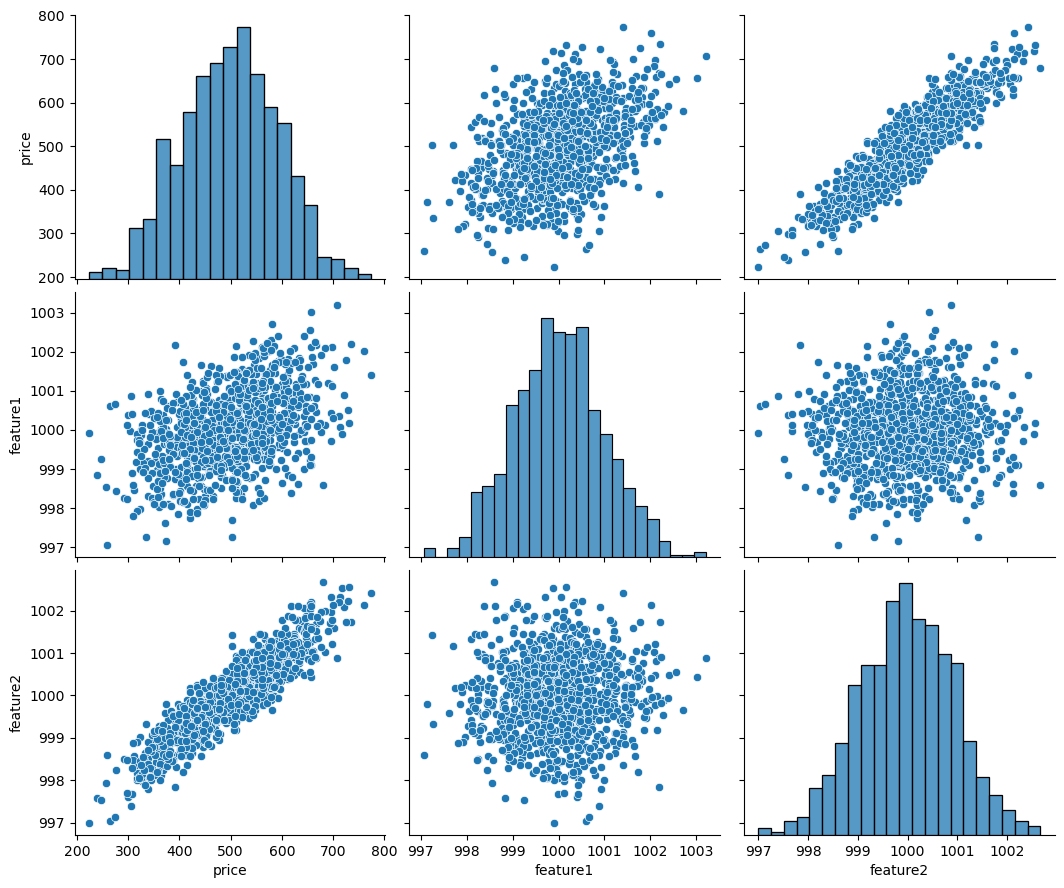

In [4]:
sns.pairplot(df, height = 3, aspect = 1.2)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1', 'feature2']].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train.shape

(700, 2)

In [8]:
X_test.shape

(300, 2)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train = scaler.transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
#help(Sequential)

In [16]:
'''
model = Sequential([Dense(units = 4, activation = 'relu'),
                   Dense(units = 2, activation='relu'),
                   Dense(units = 1])
'''

"\nmodel = Sequential([Dense(units = 4, activation = 'relu'),\n                   Dense(units = 2, activation='relu'),\n                   Dense(units = 1])\n"

In [17]:
model = Sequential()
model.add(Dense(units = 4, activation='relu'))
model.add(Dense(units = 4, activation='relu'))
model.add(Dense(units = 4, activation='relu'))

model.add(Dense(units = 1))

model.compile(optimizer='Adam', loss='mse')

In [18]:
model.fit(x = X_train , y = y_train, epochs = 250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 256306.8594
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 258258.1094 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256207.5781 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 258540.7969 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256348.2500 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256047.2344 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254601.7344 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257931.0625 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257076.8125 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257771.9531 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 261894.3750 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254314.1250 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255599.3906 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2

In [19]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss
0,256979.421875
1,256824.578125
2,256707.609375
3,256640.781250
4,256604.250000


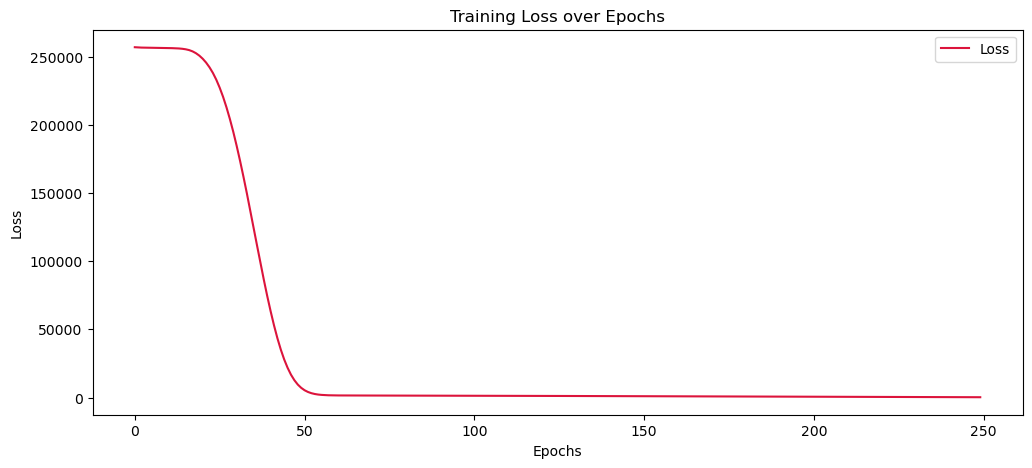

In [20]:
plt.figure(figsize=(12, 5))
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data = loss_df, x = loss_df.index, y = 'loss', color = 'crimson', label = 'Loss')
plt.legend(loc = 'upper right')
plt.show()

In [21]:
model.evaluate(X_test, y_test, verbose=0)

226.3895263671875

In [22]:
model.evaluate(X_train, y_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 237.5809 


234.00650024414062

In [23]:
pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [24]:
#pred

In [25]:
pred = pd.Series(pred.reshape(300,))

In [26]:
pred_df = pd.DataFrame(data = y_test, columns = ['True Y'])

In [27]:
pred_df

,True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [28]:
pred_df = pd.concat([pred_df, pred], axis = 1)

In [29]:
pred_df.columns = ['True Y', 'Predicted Y']

In [30]:
pred_df

,True Y,Predicted Y
0,402.296319,421.430237
1,624.156198,606.680664
2,582.455066,580.740051
3,578.588606,561.486023
4,371.224104,385.467194
...,...,...
295,525.704657,525.073792
296,502.909473,509.712036
297,612.727910,595.248291
298,417.569725,432.806274


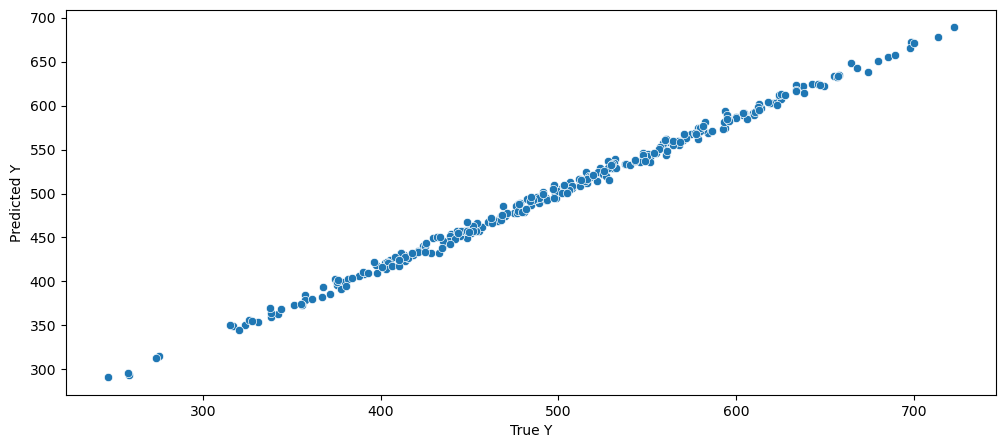

In [31]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data = pred_df, x = 'True Y', y = 'Predicted Y')
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mean_absolute_error(pred_df['True Y'], pred_df['Predicted Y'])

11.998803190068077

In [34]:
mean_squared_error(pred_df['True Y'], pred_df['Predicted Y'])

226.38950991885775

In [35]:
from tensorflow.keras.models import load_model

In [36]:
model.save('gem_model.keras')

In [37]:
later_model = load_model('gem_model.keras')